In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [77]:
df.shape

(7043, 27)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cols = df.columns
print(cols)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
for each in cols: 
    print(each , df[each].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [9]:
df.drop(columns=['customerID'], inplace=True)

In [10]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [14]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [15]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
## female 0 male 1
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [16]:
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])

In [21]:
df = df.astype({'TotalCharges': str})
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df = df.astype({'TotalCharges': float})

In [22]:
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])

In [23]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['TechSupport'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})

In [26]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded_data = encoder.fit_transform(df[['InternetService']])

In [28]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['InternetService']))

In [30]:
df_final = pd.concat([df.drop(columns=['InternetService']), encoded_df], axis=1)

In [34]:
df = df_final
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['DeviceProtection'])
df['StreamingTV'] = label_encoder.fit_transform(df['DeviceProtection'])
df['StreamingMovies'] = label_encoder.fit_transform(df['DeviceProtection'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7043 non-null   int64  
 1   SeniorCitizen                7043 non-null   int64  
 2   Partner                      7043 non-null   int64  
 3   Dependents                   7043 non-null   int64  
 4   tenure                       7043 non-null   int64  
 5   PhoneService                 7043 non-null   int64  
 6   MultipleLines                7043 non-null   int64  
 7   OnlineSecurity               7043 non-null   int64  
 8   OnlineBackup                 7043 non-null   int64  
 9   DeviceProtection             7043 non-null   int64  
 10  TechSupport                  7043 non-null   int64  
 11  StreamingTV                  7043 non-null   int64  
 12  StreamingMovies              7043 non-null   int64  
 13  Contract          

In [38]:
# Encode 'PaymentMethod' in place
encoded_data = encoder.fit_transform(df[['PaymentMethod']])

# Create DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentMethod']))

# Concatenate with original DataFrame and drop 'PaymentMethod'
df = pd.concat([df.drop(columns=['PaymentMethod']), encoded_df], axis=1)

# Encode 'PaymentMethod' in place
encoded_data = encoder.fit_transform(df[['Contract']])

# Create DataFrame with encoded column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Contract']))

# Concatenate with original DataFrame and drop 'PaymentMethod'
df = pd.concat([df.drop(columns=['Contract']), encoded_df], axis=1)


In [ ]:
df

In [40]:
## prepared and cleaned the data for exploratory data analysis

In [41]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,1,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,0,1,1,1,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [104]:
df['TotalCharges'] = df['tenure']*df['MonthlyCharges']
df.drop(columns=['tenure', 'MonthlyCharges'], inplace=True)

In [43]:
import matplotlib.pyplot as plt

In [108]:
gender_counts = df['gender'].value_counts()

<Axes: xlabel='gender'>

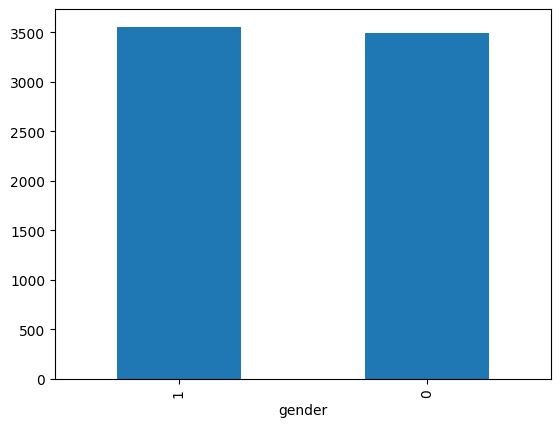

In [109]:
gender_counts.plot(kind='bar')  ## almost equal  balanced dataset

<Axes: xlabel='SeniorCitizen'>

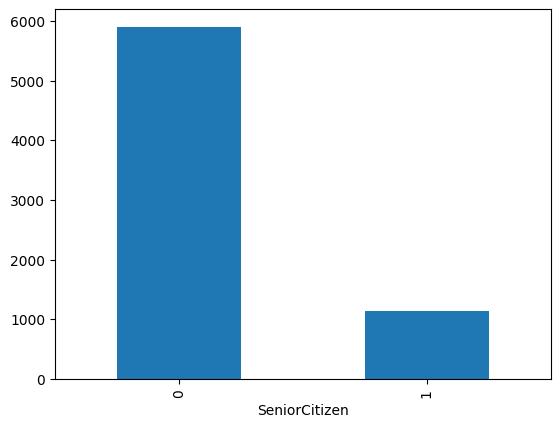

In [110]:
senior = df['SeniorCitizen'].value_counts()
senior.plot(kind='bar')   ## youngster have more telecom subscriptions

<Axes: xlabel='Partner'>

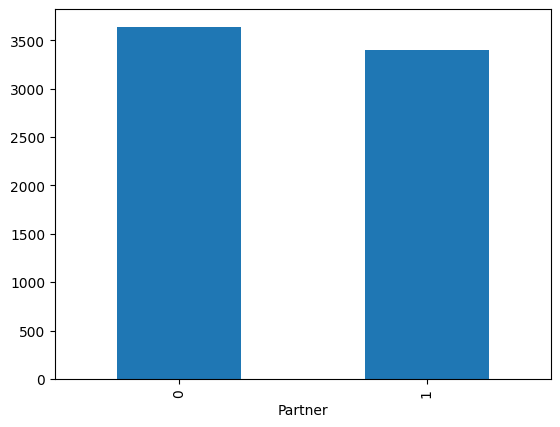

In [63]:
senior = df['Partner'].value_counts()
senior.plot(kind='bar')   

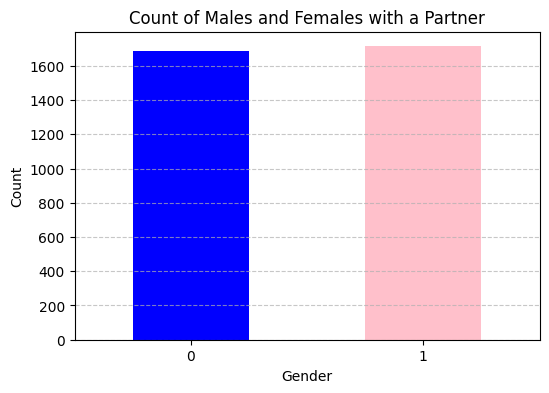

In [75]:
# Count males and females who have a partner
partner_counts = df[df['Partner'] == 1].groupby('gender').size()

# Plotting
partner_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(6, 4))

# Customization
plt.title('Count of Males and Females with a Partner')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [78]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


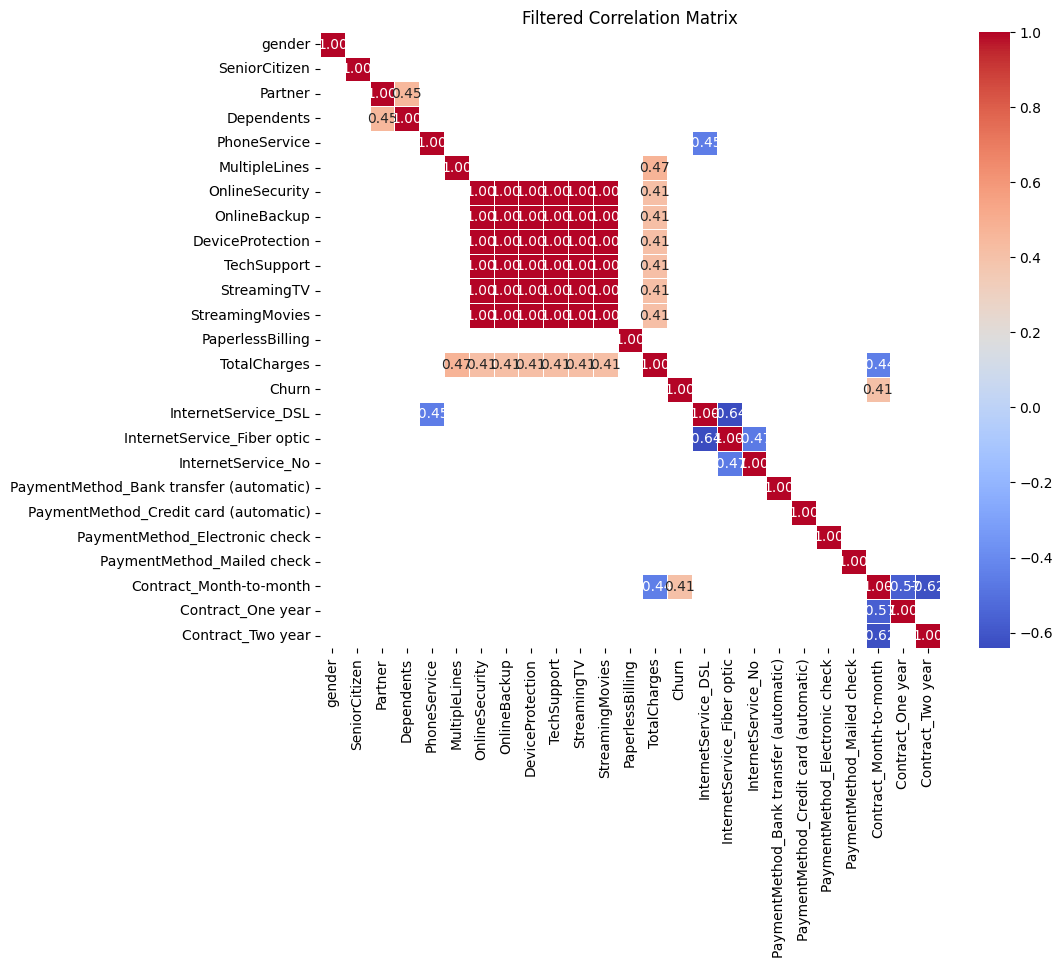

In [111]:
# Compute correlation matrix
corr_matrix = df.corr()

# Filter only high correlations (absolute value > 0.5)
filtered_corr = corr_matrix[abs(corr_matrix) > 0.4]

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Filtered Correlation Matrix')
plt.show()

In [ ]:
## lets try training without without doing anything 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [112]:
X, y = df.drop(columns=['Churn']), df['Churn']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [115]:
## model without good eda
first_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [116]:
first_model.score(X_cv, y_cv)  ## 79% , very fast prediction

0.7975402081362346

In [65]:
0   gender                       7043 non-null   int64  
 1   SeniorCitizen                7043 non-null   int64  
 2   Partner                      7043 non-null   int64  
 3   Dependents                   7043 non-null   int64  
 4   tenure                       7043 non-null   int64  
 5   PhoneService                 7043 non-null   int64  
 6   MultipleLines                7043 non-null   int64  
 7   OnlineSecurity               7043 non-null   int64  
 8   OnlineBackup                 7043 non-null   int64  
 9   DeviceProtection             7043 non-null   int64  
 10  TechSupport                  7043 non-null   int64  
 11  StreamingTV                  7043 non-null   int64  
 12  StreamingMovies              7043 non-null   int64  
 13  Contract                     7043 non-null   object 
 14  PaperlessBilling             7043 non-null   int64  
 15  PaymentMethod                7043 non-null   object 
 16  MonthlyCharges               7043 non-null   float64
 17  TotalCharges                 7032 non-null   float64
 18  Churn                        7043 non-null   int64  
 19  InternetService_DSL          7043 non-null   int64  
 20  InternetService_Fiber optic  7043 non-null   int64  
 21  InternetService_No           7043

SyntaxError: invalid syntax (<ipython-input-65-a7a5a7816979>, line 1)